<a href="https://colab.research.google.com/github/Agnes-FD/Agnes-FD/blob/main/TA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Memasukkan data dari google drive

from google.colab import drive
drive.mount ('/content/drive') 

Mounted at /content/drive


In [14]:
cd '/content/drive/MyDrive/data'

/content/drive/MyDrive/data


In [15]:
ls

with_mask/  without_mask/


In [18]:
import os
path = '/content/drive/MyDrive/data'

file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(path):
  for name in files:
    full_path.append(os.path.join(path, name))
    tag.append(path.split('/')[-1])
    file_name.append(name)

In [19]:
print(tag)

['with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask'

In [20]:
# Membuat Label pada dataset berdasarkan klasifikasi
import pandas as pd

df = pd.DataFrame({"path":full_path, "file_name": file_name, "tag":tag})
df.groupby(['tag']).size()

tag
with_mask       3725
without_mask    3828
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7553 entries, 0 to 7552
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path       7553 non-null   object
 1   file_name  7553 non-null   object
 2   tag        7553 non-null   object
dtypes: object(3)
memory usage: 177.1+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Category')

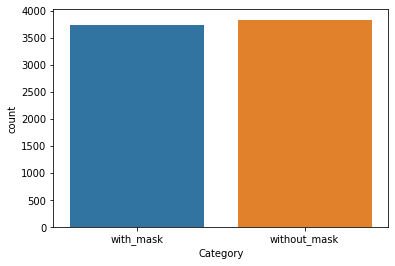

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df.tag)
plt.xlabel('Category')

In [23]:
df

,path,file_name,tag
0,/content/drive/MyDrive/data/with_mask/with_mas...,with_mask_3354.jpg,with_mask
1,/content/drive/MyDrive/data/with_mask/with_mas...,with_mask_3422.jpg,with_mask
2,/content/drive/MyDrive/data/with_mask/with_mas...,with_mask_3417.jpg,with_mask
3,/content/drive/MyDrive/data/with_mask/with_mas...,with_mask_3436.jpg,with_mask
4,/content/drive/MyDrive/data/with_mask/with_mas...,with_mask_3508.jpg,with_mask
...,...,...,...
7548,/content/drive/MyDrive/data/without_mask/witho...,without_mask_1377.jpg,without_mask
7549,/content/drive/MyDrive/data/without_mask/witho...,without_mask_1659.jpg,without_mask
7550,/content/drive/MyDrive/data/without_mask/witho...,without_mask_2527.jpg,without_mask
7551,/content/drive/MyDrive/data/without_mask/witho...,without_mask_2550.jpg,without_mask


In [24]:
# Membagi dataset menjadi dua bagian (train dan test)
from sklearn.model_selection import train_test_split

x = df['path']
y = df['tag']

x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size= 0.2, random_state=1
)

In [25]:
df_test = pd.DataFrame({
    'path' : x_test,
    'tag' : y_test,
    'set' : 'test-set'
})

df_train = pd.DataFrame({
    'path' : x_train,
    'tag' : y_train,
    'set' : 'train-set'
})

In [26]:
print('train size', len(df_train))
print('test size', len(df_test))

train size 6042
test size 1511


In [27]:
df_all = df_train.append([df_test]).reset_index(drop=1)

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

df_all.sample(4)


set        tag         
test-set   with_mask        741
           without_mask     770
train-set  with_mask       2984
           without_mask    3058
dtype: int64 




,path,tag,set
7025,/content/drive/MyDrive/data/without_mask/witho...,without_mask,test-set
2521,/content/drive/MyDrive/data/without_mask/witho...,without_mask,train-set
3975,/content/drive/MyDrive/data/with_mask/with_mas...,with_mask,train-set
69,/content/drive/MyDrive/data/without_mask/witho...,without_mask,train-set


In [28]:
# Memindahkan dataset
import shutil
from tqdm.notebook import tqdm as tq

In [31]:
datasource_path = '/content/drive/MyDrive/data'
dataset_path = '/content/drive/MyDrive/dataset'

In [32]:
for index, row in tq(df_all.iterrows()):
  file_path = row['path']

  if os.path.exists(file_path) == False:
    file_path = os.path.join(datasource_path, row['tag'], row['image'].split('.')[0])

  if os.path.exists(os.path.join(dataset_path, row['set'], row['tag'])) == False:
    os.makedirs(os.path.join(dataset_path, row['set'], row['tag']))
  
  destination_file_name = file_path.split('/')[-1]
  file_dest = os.path.join(dataset_path, row['set'], row['tag'], destination_file_name)

  if os.path.exists(file_dest) == False:
    shutil.copy2(file_path, file_dest)

In [33]:
# Define Directory
base_dir = '/content/drive/MyDrive/dataset'
train_dir = os.path.join(base_dir, 'train-set')
test_dir = os.path.join(base_dir, 'test-set')

In [34]:
os.listdir(train_dir)

['without_mask', 'with_mask']

In [35]:
os.listdir(test_dir)

['with_mask', 'without_mask']

In [36]:
train_without_mask_dir = os.path.join(train_dir, 'without_mask')
train_with_mask_dir = os.path.join(train_dir, 'with_mask')
test_without_mask_dir = os.path.join(test_dir, 'without_mask')
test_with_mask_dir = os.path.join(test_dir, 'with_mask')

In [37]:
# Image Augmentation
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.4.1


In [38]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary'
)

Found 6042 images belonging to 2 classes.
Found 1511 images belonging to 2 classes.


In [56]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input

In [57]:
# Membuat Model CNN menggunakan Transfer Learning MobileNetV2
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 256)       295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30976)            

In [58]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=1e-4)

In [59]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print('Akurasi mencapai 90%, proses training dihentikan!')
      self.model.stop_training = True

callbacks = myCallback()

In [60]:
model_cnn.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history_cnn = model_cnn.fit(
    train_generator,
    steps_per_epoch = 20,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 3,
    callbacks = [callbacks]
)

Epoch 1/100
20/20 [==============================] - 43s 2s/step - loss: 0.7377 - accuracy: 0.4694 - val_loss: 0.6914 - val_accuracy: 0.5625
Epoch 2/100
20/20 [==============================] - 41s 2s/step - loss: 0.6951 - accuracy: 0.4766 - val_loss: 0.6883 - val_accuracy: 0.5625
Epoch 3/100
20/20 [==============================] - 41s 2s/step - loss: 0.6882 - accuracy: 0.5061 - val_loss: 0.7009 - val_accuracy: 0.4583
Epoch 4/100
20/20 [==============================] - 41s 2s/step - loss: 0.6963 - accuracy: 0.5236 - val_loss: 0.6115 - val_accuracy: 0.7708
Epoch 5/100
20/20 [==============================] - 41s 2s/step - loss: 0.6648 - accuracy: 0.6410 - val_loss: 0.5955 - val_accuracy: 0.7917
Epoch 6/100
20/20 [==============================] - 40s 2s/step - loss: 0.6163 - accuracy: 0.6049 - val_loss: 0.4439 - val_accuracy: 0.7500
Epoch 7/100
20/20 [==============================] - 40s 2s/step - loss: 0.5092 - accuracy: 0.7753 - val_loss: 0.5905 - val_accuracy: 0.6875
Epoch 8/100
2

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 40s 2s/step - loss: 0.4041 - accuracy: 0.8405 - val_loss: 0.3428 - val_accuracy: 0.8125
Epoch 26/100
20/20 [==============================] - 40s 2s/step - loss: 0.3673 - accuracy: 0.8428 - val_loss: 0.2997 - val_accuracy: 0.8542
Epoch 27/100
20/20 [==============================] - 40s 2s/step - loss: 0.3398 - accuracy: 0.8693 - val_loss: 0.2597 - val_accuracy: 0.8750
Epoch 28/100
20/20 [==============================] - 40s 2s/step - loss: 0.3831 - accuracy: 0.8321 - val_loss: 0.3651 - val_accuracy: 0.8125
Epoch 29/100
20/20 [==============================] - 40s 2s/step - loss: 0.3623 - accuracy: 0.8625 - val_loss: 0.3013 - val_accuracy: 0.8750
Epoch 30/100
20/20 [==============================] - 40s 2s/step - loss: 0.3542 - accuracy: 0.8043 - val_loss: 0.2309 - val_accuracy: 0.9375
Epoch 31/100
20/20 [==============================] - 40s 2s/step - loss: 0.3194 - accuracy: 0.8540 - val_loss: 0.4796 - val_accuracy: 0.7708
Epoch 32/100
20/20 

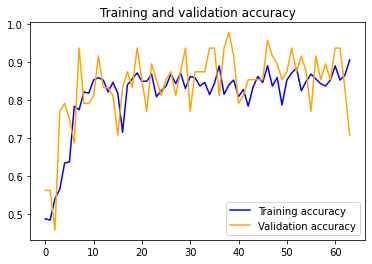

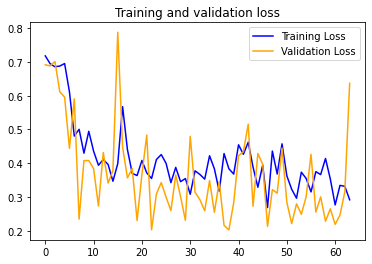

In [63]:
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'blue', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'blue', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving irmy.jpg to irmy.jpg


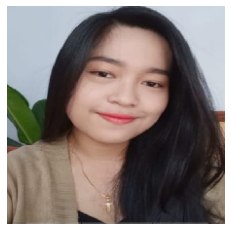

Not Wearing Masker


In [64]:
from google.colab import files
from keras.preprocessing import image
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path,target_size=(224,224))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img = np.array(img, dtype='float')
  img = img.reshape(1, 224, 224, 3)
  prediksi = model_cnn.predict(img)
  idx = prediksi[0][0]
  if (idx):
      print("Not Wearing Masker")
  else:
      print("Wearing Masker")

Saving mega.jpg to mega.jpg


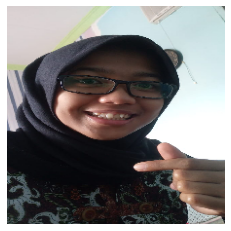

Not Wearing Masker


In [65]:
from google.colab import files
from keras.preprocessing import image
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path,target_size=(224,224))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img = np.array(img, dtype='float')
  img = img.reshape(1, 224, 224, 3)
  prediksi = model_cnn.predict(img)
  idx = prediksi[0][0]
  if (idx):
      print("Not Wearing Masker")
  else:
      print("Wearing Masker")

Saving index.jpg to index.jpg


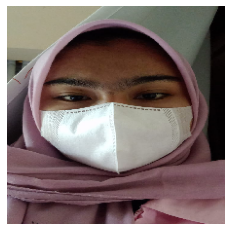

Wearing Masker


In [66]:
from google.colab import files
from keras.preprocessing import image
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path,target_size=(224,224))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img = np.array(img, dtype='float')
  img = img.reshape(1, 224, 224, 3)
  prediksi = model_cnn.predict(img)
  idx = prediksi[0][0]
  if (idx):
      print("Not Wearing Masker")
  else:
      print("Wearing Masker")

In [1]:
model_cnn.save("/content/model_cnn.h5")

NameError: ignored